In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import seaborn as sns

In [2]:
df = pd.read_csv("5lkh.csv")

In [3]:
df

,datetime,close
0,2019-01-01 18:02:00,2501.25
1,2019-01-01 18:03:00,2504.50
2,2019-01-01 18:04:00,2508.50
3,2019-01-01 18:05:00,2507.25
4,2019-01-01 18:06:00,2507.50
...,...,...
262139,2019-10-01 04:56:00,2969.25
262140,2019-10-01 04:57:00,2969.00
262141,2019-10-01 04:58:00,2969.00
262142,2019-10-01 04:59:00,2969.00


In [4]:
df2 = df.set_index('datetime')

In [5]:
df2

,close
datetime,
2019-01-01 18:02:00,2501.25
2019-01-01 18:03:00,2504.50
2019-01-01 18:04:00,2508.50
2019-01-01 18:05:00,2507.25
2019-01-01 18:06:00,2507.50
...,...
2019-10-01 04:56:00,2969.25
2019-10-01 04:57:00,2969.00
2019-10-01 04:58:00,2969.00


In [6]:
df2['logReturn'] = np.log(df2.close/df2.close.shift(1))

In [7]:
df2['sqrd_return'] = df2['logReturn']**2

In [8]:
df2['abs_return'] = df2['logReturn'].abs()

In [9]:
df2

,close,logReturn,sqrd_return,abs_return
datetime,,,,
2019-01-01 18:02:00,2501.25,NaN,NaN,NaN
2019-01-01 18:03:00,2504.50,0.001299,1.686120e-06,0.001299
2019-01-01 18:04:00,2508.50,0.001596,2.546741e-06,0.001596
2019-01-01 18:05:00,2507.25,-0.000498,2.484324e-07,0.000498
2019-01-01 18:06:00,2507.50,0.000100,9.941260e-09,0.000100
...,...,...,...,...
2019-10-01 04:56:00,2969.25,-0.000084,7.088428e-09,0.000084
2019-10-01 04:57:00,2969.00,-0.000084,7.089622e-09,0.000084
2019-10-01 04:58:00,2969.00,0.000000,0.000000e+00,0.000000


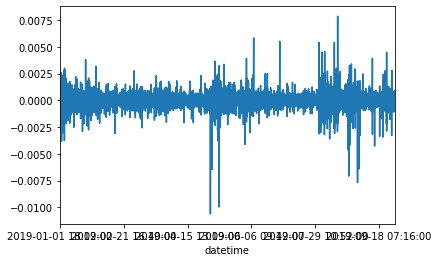

In [10]:
df2['logReturn'].plot()

In [11]:
def zscore(returns):
    return (returns-returns.mean())/np.std(returns)

In [12]:
normalized = zscore(df2.logReturn)

Text(0, 0.5, 'Normalized Returns')

C:\Users\TAN\Anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\TAN\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


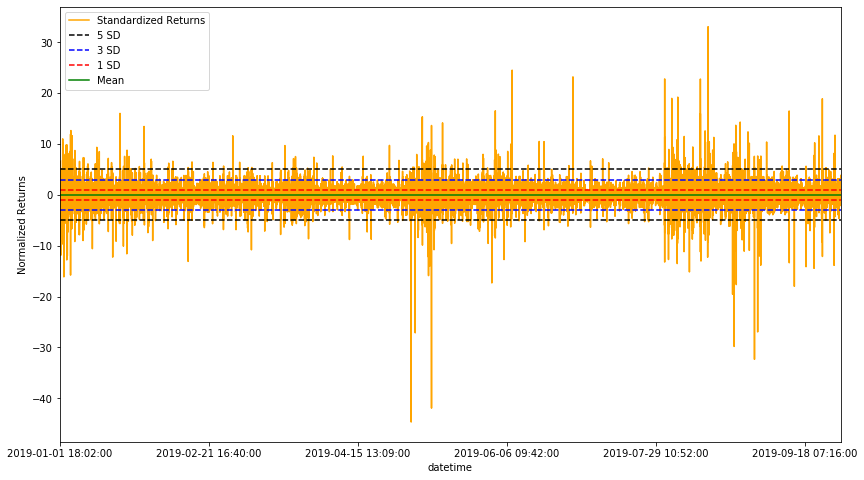

In [13]:
normalized.plot(figsize=(14,8),label='Standardized Returns',color='orange')
plt.axhline(normalized.std()*3,color='blue',ls='--')
plt.axhline(normalized.std()*5,color='black',ls='--')
plt.axhline(normalized.std()*-5,color='black',label='5 SD',ls='--')
plt.axhline(normalized.std()*-3,color='blue',label='3 SD',ls='--')
plt.axhline(normalized.std(),color='red',ls='--')
plt.axhline(normalized.std()*-1,color='red',ls='--',label='1 SD')
plt.axhline(normalized.mean(),color='green',label='Mean')
plt.legend()
plt.ylabel("Normalized Returns",size=10)

Text(0.5, 1.0, 'ACF LAG for Prices')

<Figure size 2160x1440 with 0 Axes>

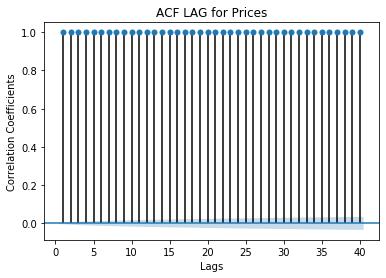

In [14]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.close,lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Prices")

Text(0.5, 1.0, 'ACF LAG for Log Returns')

<Figure size 2160x1440 with 0 Axes>

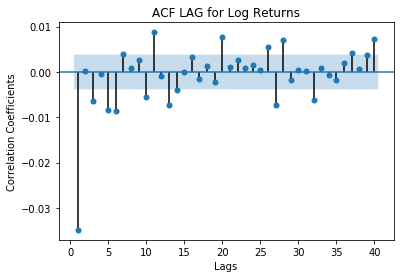

In [15]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.logReturn[1:],lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Log Returns")

Text(0.5, 1.0, 'ACF LAG for Squarred Log Returns')

<Figure size 2160x1440 with 0 Axes>

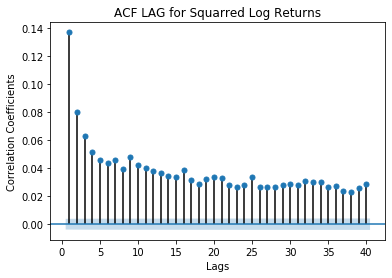

In [16]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.sqrd_return[1:],lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Squarred Log Returns")

In [17]:
#df2.to_csv("HFT_65536_Futures.csv")

Text(0.5, 1.0, 'ACF LAG for Absolute Log Returns')

<Figure size 2160x1440 with 0 Axes>

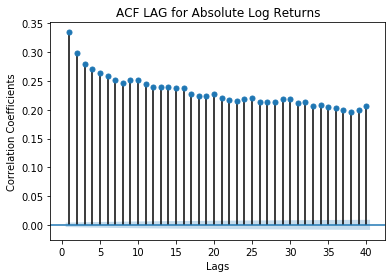

In [18]:
plt.figure(figsize = (30,20))
sgt.plot_acf(df2.abs_return[1:],lags=40,zero=False)
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficients')
plt.title("ACF LAG for Absolute Log Returns")

In [19]:
s = pd.Series(df2['close'])

In [20]:
s.autocorr(lag=1)

0.9999844490097191

In [21]:
s.autocorr(lag=2) 

0.999969968312313

In [22]:
s.autocorr(lag=3) 

0.9999554833377392

In [23]:
s.autocorr(lag=4) 

0.9999411916597751

In [24]:
s.autocorr(lag=5)

0.9999269458523597

In [25]:
s = pd.Series(df2['logReturn'])

In [26]:
s.autocorr(lag=1)

-0.03486044395419685

In [27]:
s.autocorr(lag=2) 

0.00031510717803129355

In [28]:
s.autocorr(lag=3) 

-0.006469570907478758

In [29]:
s.autocorr(lag=4) 

-0.0005320790809266289

In [30]:
s.autocorr(lag=5)

-0.00848407442976978

In [31]:
df2

,close,logReturn,sqrd_return,abs_return
datetime,,,,
2019-01-01 18:02:00,2501.25,NaN,NaN,NaN
2019-01-01 18:03:00,2504.50,0.001299,1.686120e-06,0.001299
2019-01-01 18:04:00,2508.50,0.001596,2.546741e-06,0.001596
2019-01-01 18:05:00,2507.25,-0.000498,2.484324e-07,0.000498
2019-01-01 18:06:00,2507.50,0.000100,9.941260e-09,0.000100
...,...,...,...,...
2019-10-01 04:56:00,2969.25,-0.000084,7.088428e-09,0.000084
2019-10-01 04:57:00,2969.00,-0.000084,7.089622e-09,0.000084
2019-10-01 04:58:00,2969.00,0.000000,0.000000e+00,0.000000


In [32]:
s = pd.Series(df2['sqrd_return'])

In [33]:
s.autocorr(lag=1)

0.13715393769651338

In [34]:
s.autocorr(lag=2) 

0.08017142013334083

In [35]:
s.autocorr(lag=3) 

0.06281455952333703

In [36]:
s.autocorr(lag=4) 

0.05166461697670161

In [37]:
s.autocorr(lag=5)

0.0461322897852874

In [38]:
s = pd.Series(df2['abs_return'])

In [39]:
s.autocorr(lag=1)

0.3347595875318524

In [40]:
s.autocorr(lag=2) 

0.2988474670812927

In [41]:
s.autocorr(lag=3) 

0.2800600139939538

In [42]:
s.autocorr(lag=4) 

0.270248066029862

In [43]:
s.autocorr(lag=5)

0.26439875119723855